In [1]:
!nvidia-smi

Thu Mar 13 15:06:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
File ID: 15J4mG6ZXdDdXzyZYSVEKtk-YIj_RZ8Mo


Downloading...
From (original): https://drive.google.com/uc?/export=download&id=15J4mG6ZXdDdXzyZYSVEKtk-YIj_RZ8Mo
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=15J4mG6ZXdDdXzyZYSVEKtk-YIj_RZ8Mo&confirm=t&uuid=0598c3b0-ca49-4569-b310-a5613f67ffd8
To: /content/sign_data.zip
100%|██████████| 152M/152M [00:02<00:00, 73.2MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: train/labels/12_jpg.rf.6e7bafdd1a2d0f7bd58156b7d1380008.txt  
  inflating: train/labels/12_jpg.rf.6fdcb75ebcf1110c8b684ef397097d7a.txt  
  inflating: train/labels/12_jpg.rf.702363038d5ff8d28c854aa1da04f828.txt  
  inflating: train/labels/12_jpg.rf.705322897e2178fe697e88218fda8fd0.txt  
  inflating: train/labels/12_jpg.rf.74eba0c1b2c92ad54c055e7fadd87b43.txt  
  inflating: train/labels/12_jpg.rf.769c1e90fbd82b38a9c148e649ae2d99.txt  
 extracting: train/labels/12_jpg.rf.7e648838f70c8e0d0790c1a93f494c37.txt  
  inflating: train/labels/12_jpg.rf.8af3f22f43d414fb395d497b8e0bca4c.txt  
  inflating: train/labels/12_jpg.rf.8d55d7a8c52e70a9312e4ece0b2ffa7b.txt  
  inflating: train/labels/12_jpg.rf.8fec62fb333723f0944d0348abf4e1d8.txt  
  inflating: train/labels/12_jpg.rf.90423955a9ad32d5375689be732b2176.txt  
  inflating: train/labels/12_jpg.rf.91294882eb99f1e3f475256ef8e348c9.txt  
  inflating: train/labels/12_jpg.rf.92f5e3ab30579

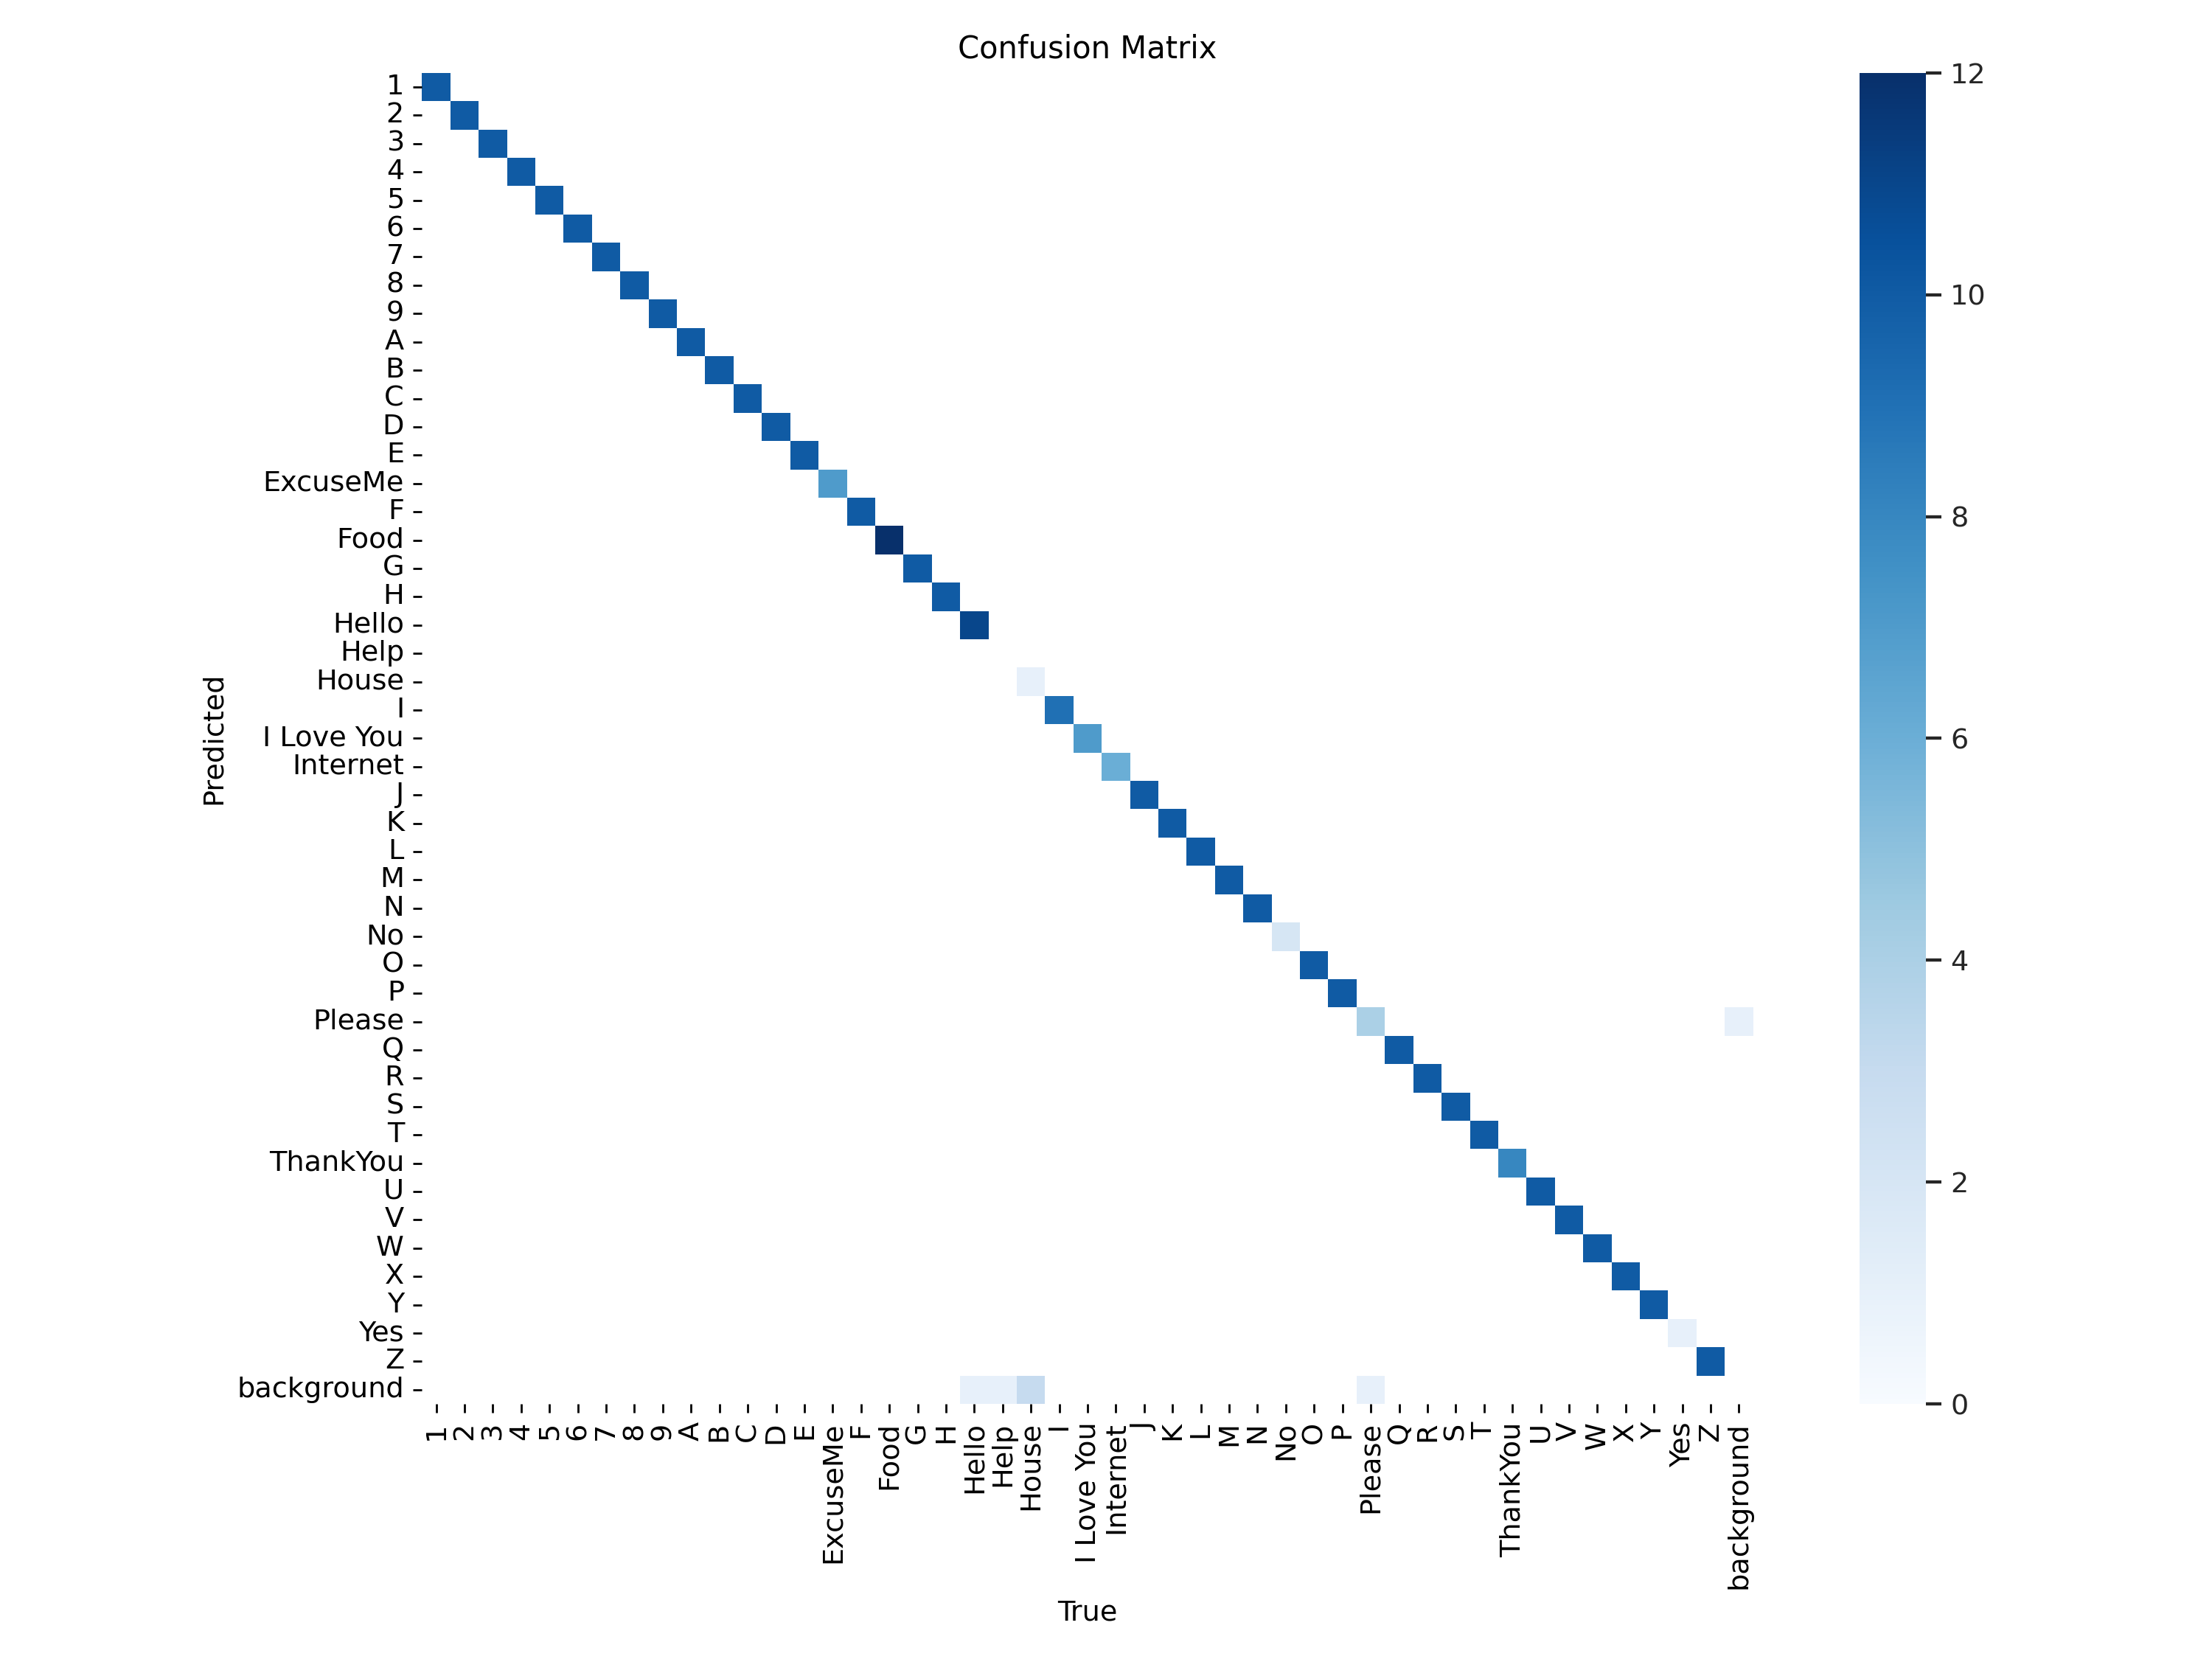

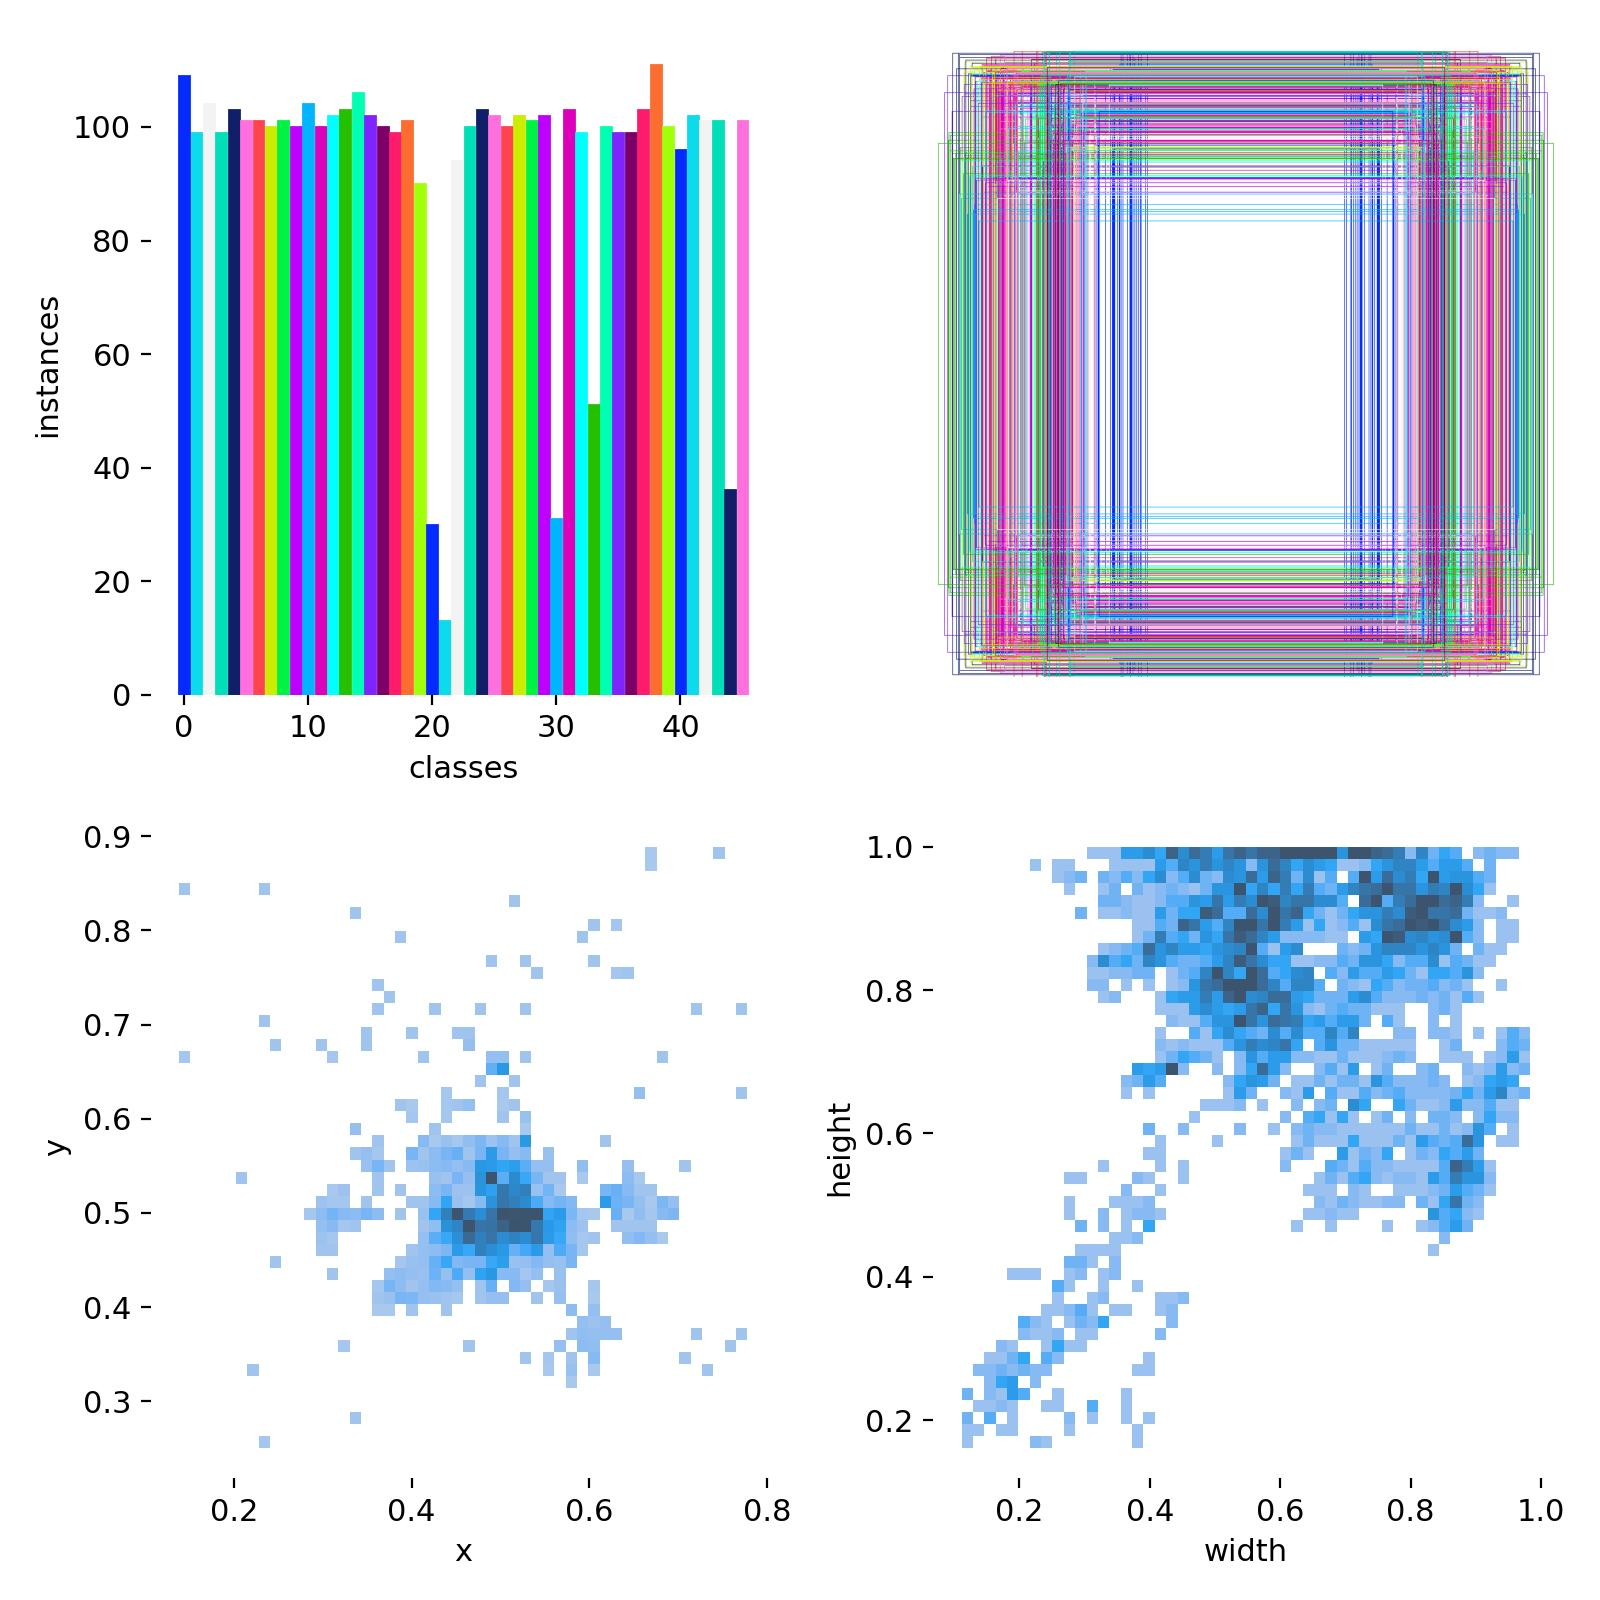

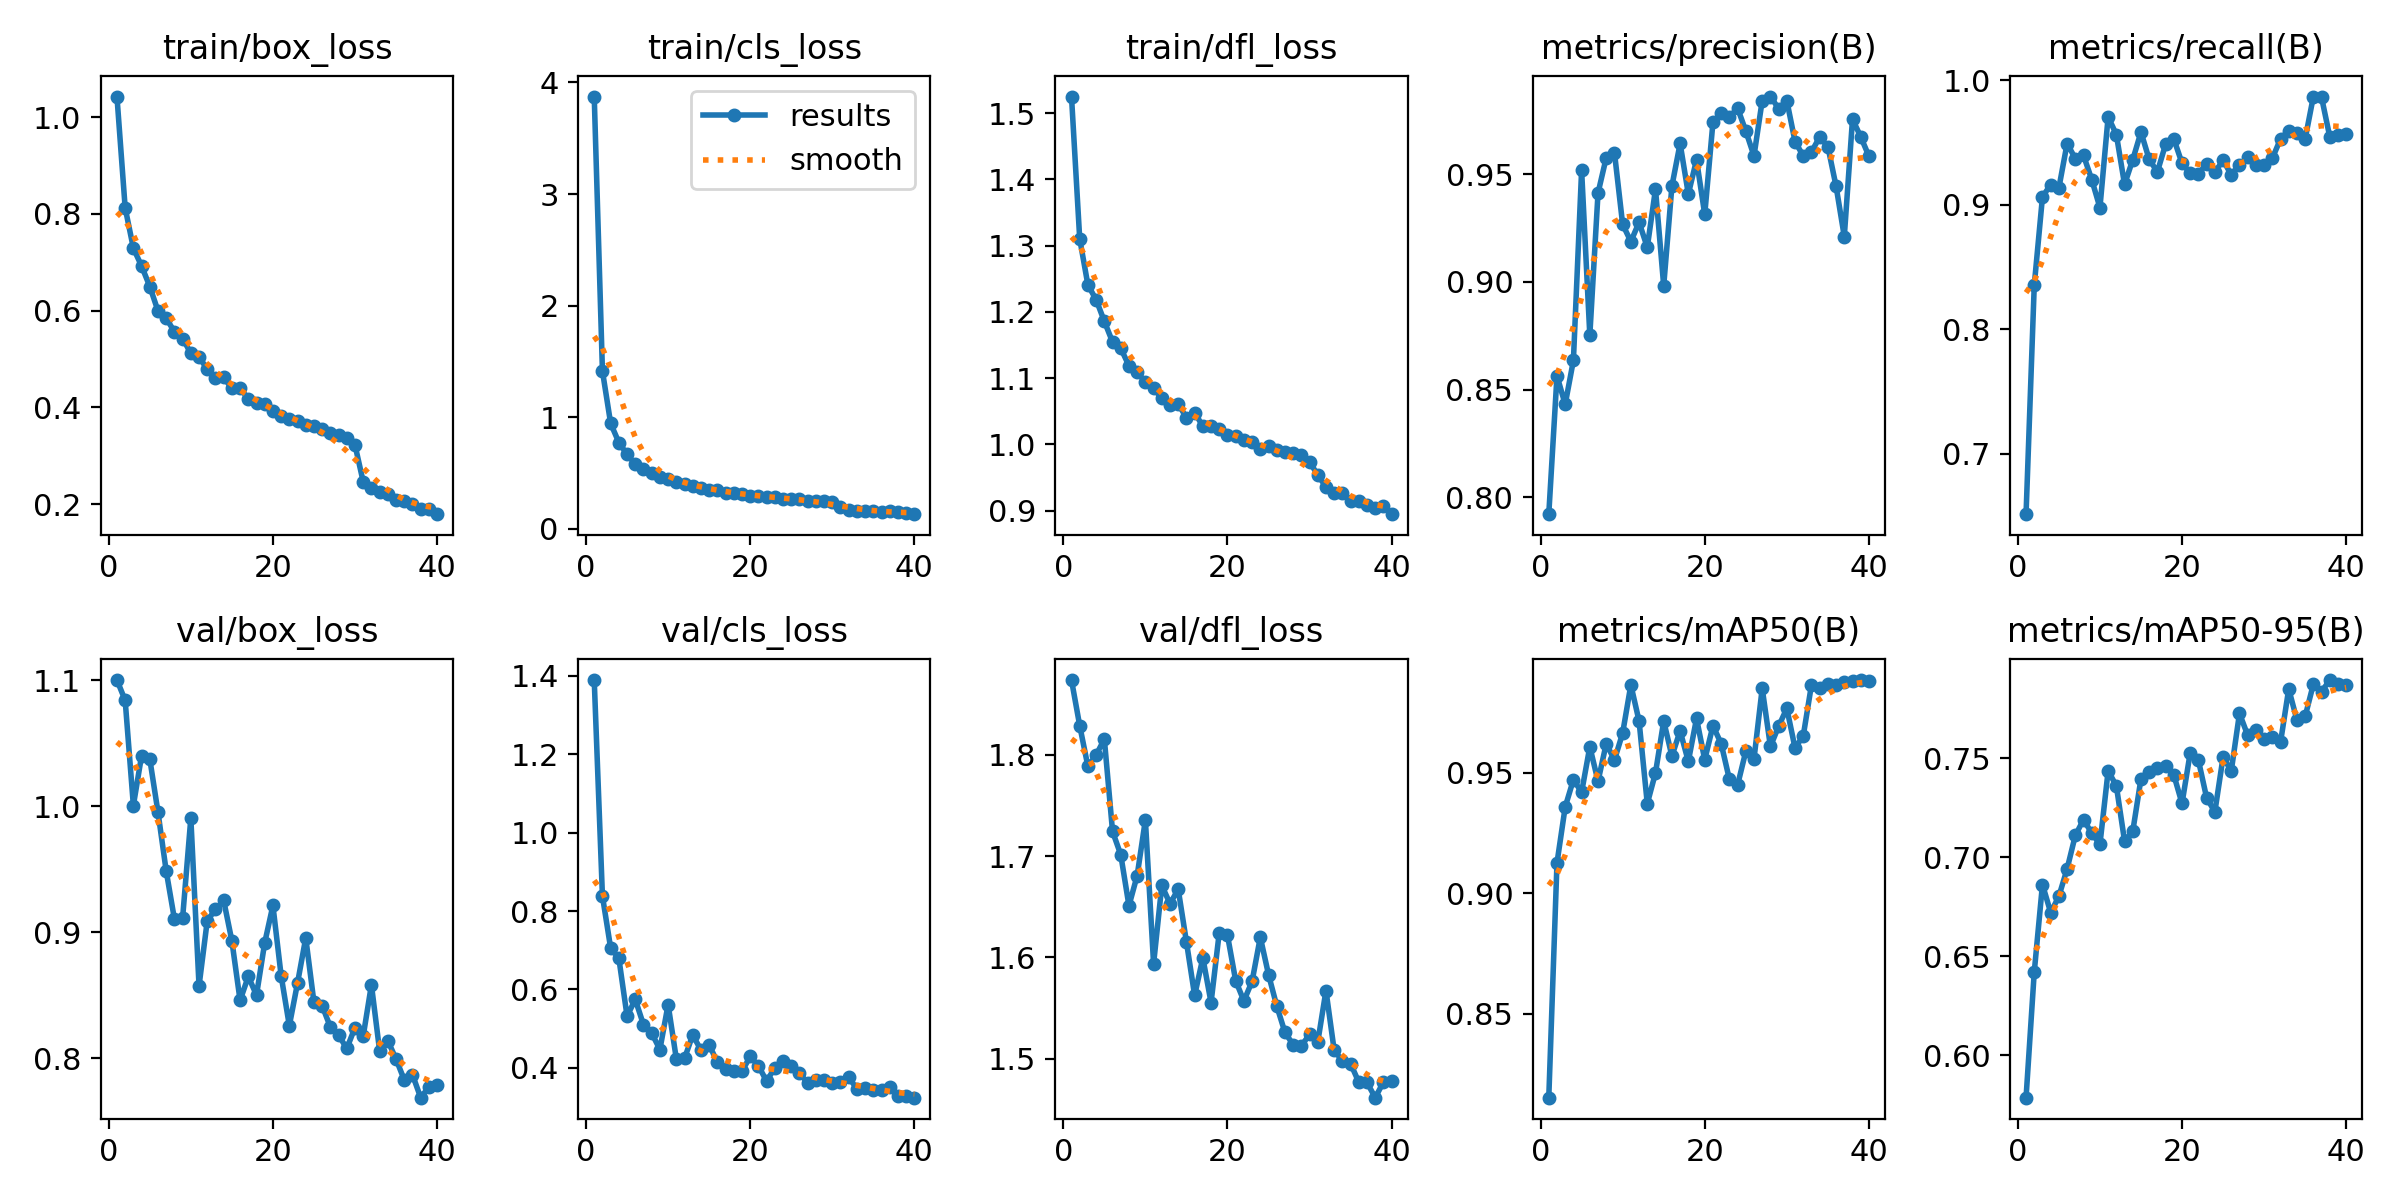

In [3]:
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import Image, display
import gdown
import glob
import os
import yaml

# Step 1: Download the data from Google Drive
url = "https://drive.google.com/file/d/15J4mG6ZXdDdXzyZYSVEKtk-YIj_RZ8Mo/view?usp=drive_link"
file_id = url.split("/")[-2]
print("File ID:", file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, "sign_data.zip", quiet=False)

# Step 2: Unzip the dataset
!unzip -o sign_data.zip

# Load the YAML data file for reference
with open("/content/data.yaml", 'r') as file:
    data_yaml = yaml.safe_load(file)
    print("YAML Config Loaded:", data_yaml)

# Step 3: Train the YOLO model
start_time = time.time()

!yolo task=detect mode=train data="/content/data.yaml" model="yolo11s.pt" epochs=40 imgsz=640

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Model training completed in {elapsed_time // 60:.0f} minutes and {elapsed_time % 60:.0f} seconds.")

# Display model performance details
metrics_folder = "/content/runs/detect/train"

display(Image(f"{metrics_folder}/confusion_matrix.png", width=600))
display(Image(f"{metrics_folder}/labels.jpg", width=600))
display(Image(f"{metrics_folder}/results.png", width=600))

# Plot training vs. test metrics
train_results_file = f"{metrics_folder}/results.csv"




In [4]:
# Display model performance details
from IPython.display import Image
metrics_folder = "/content/runs/detect/train"

Image(f"{metrics_folder}/confusion_matrix.png", width=600)
Image(f"{metrics_folder}/labels.jpg", width=600)
Image(f"{metrics_folder}/results.png", width=600)

# Plot training vs. test metrics
train_results_file = f"{metrics_folder}/results.csv"

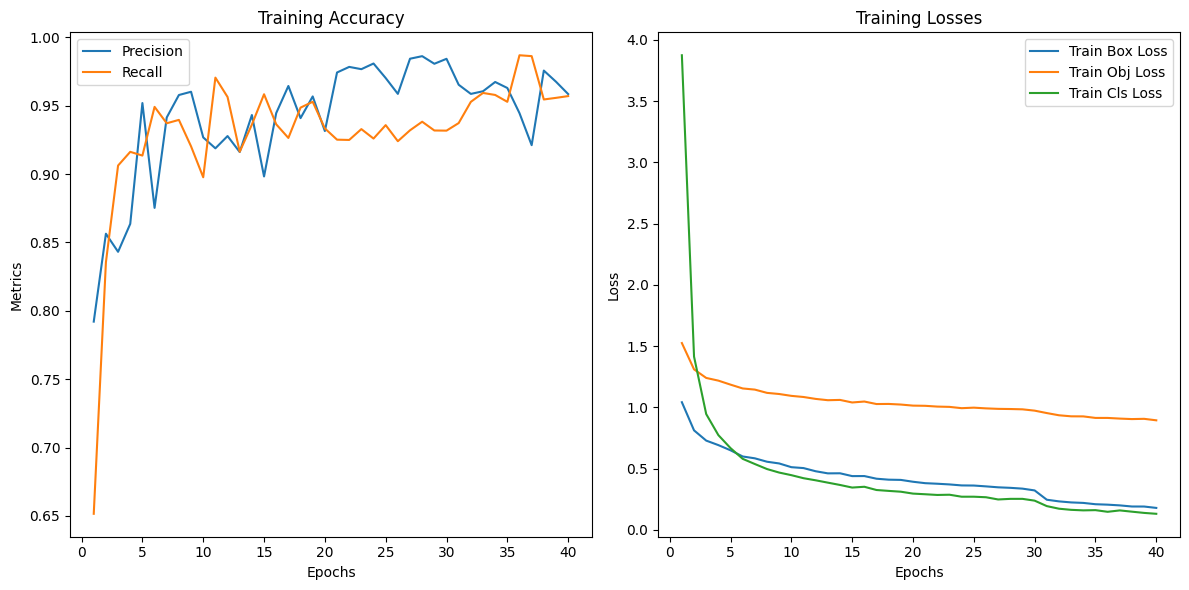

In [5]:
def plot_metrics(results_file):
    import pandas as pd

    # Load the results CSV
    results = pd.read_csv(results_file)

    epochs = results.index + 1

    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results['metrics/precision(B)'], label='Precision')
    plt.plot(epochs, results['metrics/recall(B)'], label='Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results['train/box_loss'], label='Train Box Loss')
    plt.plot(epochs, results['train/dfl_loss'], label='Train Obj Loss')
    plt.plot(epochs, results['train/cls_loss'], label='Train Cls Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Losses')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(train_results_file)



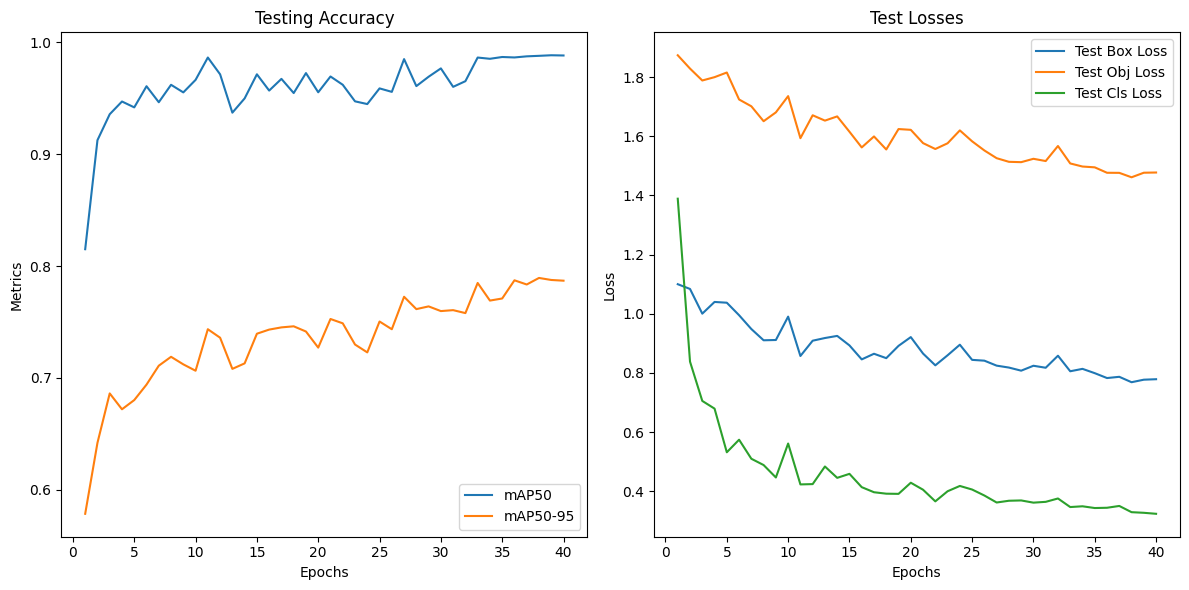

In [6]:
def plot_metrics(results_file):
    import pandas as pd

    # Load the results CSV
    results = pd.read_csv(results_file)

    epochs = results.index + 1

    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results['metrics/mAP50(B)'], label='mAP50')
    plt.plot(epochs, results['metrics/mAP50-95(B)'], label='mAP50-95')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Testing Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results['val/box_loss'], label='Test Box Loss')
    plt.plot(epochs, results['val/dfl_loss'], label='Test Obj Loss')
    plt.plot(epochs, results['val/cls_loss'], label='Test Cls Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Test Losses')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(train_results_file)



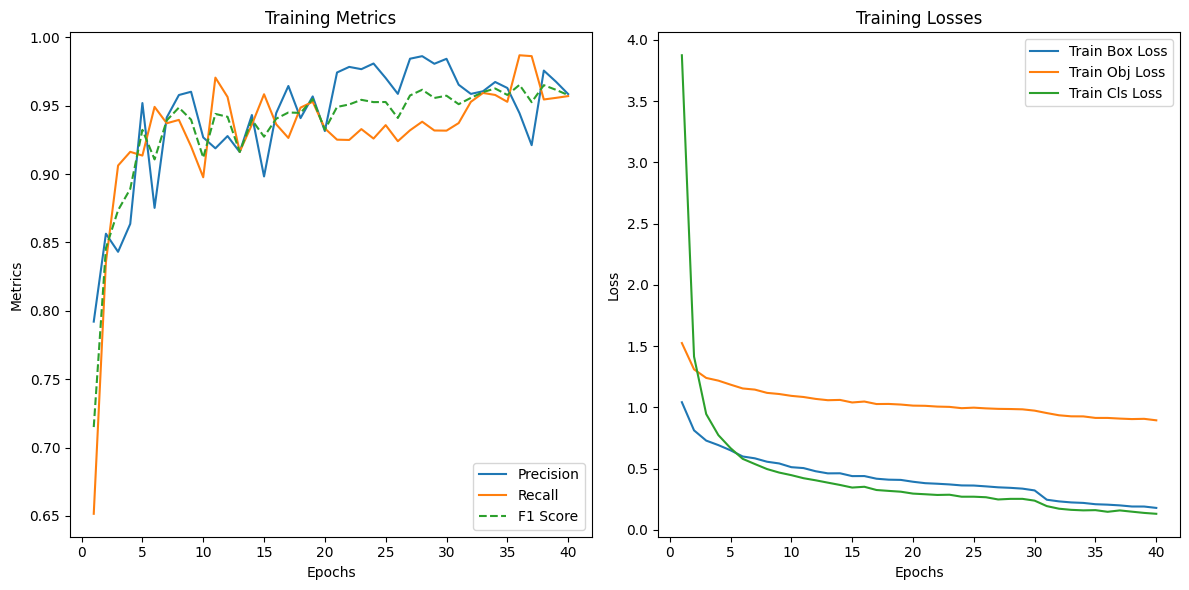

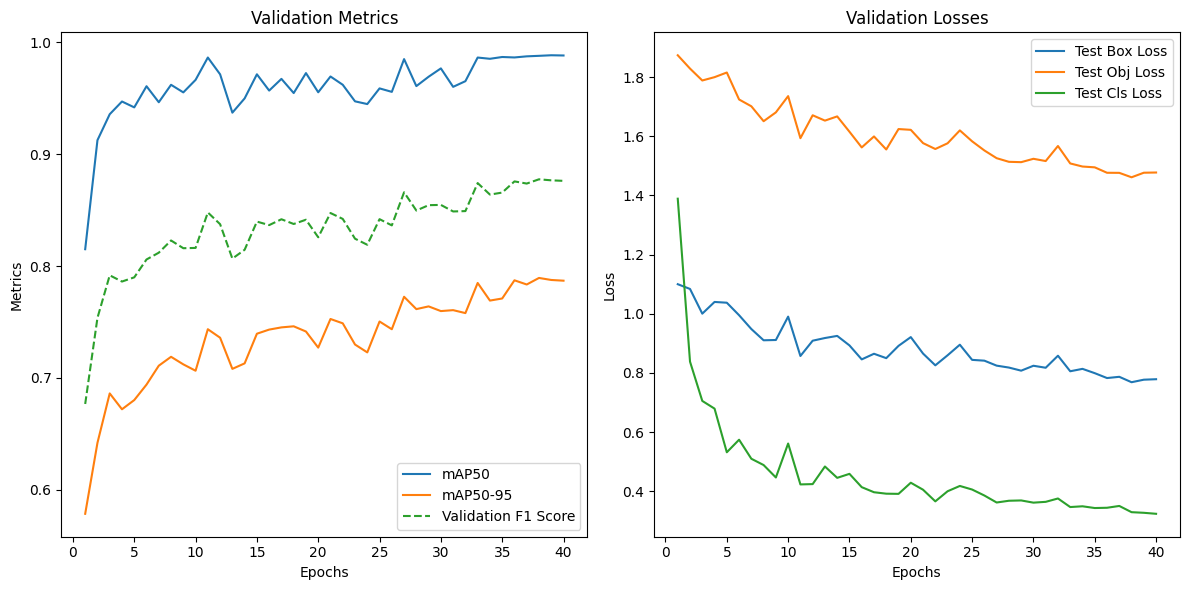

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics_with_f1(results_file):
    # Load the results CSV
    results = pd.read_csv(results_file)
    epochs = results.index + 1

    # Calculate Training F1 Score
    precision = results['metrics/precision(B)']
    recall = results['metrics/recall(B)']
    f1_score = 2 * (precision * recall) / (precision + recall)
    results['metrics/F1_Score(B)'] = f1_score  # Add F1 Score to DataFrame

    # Plot Training Metrics
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, precision, label='Precision')
    plt.plot(epochs, recall, label='Recall')
    plt.plot(epochs, f1_score, label='F1 Score', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Metrics')
    plt.legend()

    # Plot Training Losses
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results['train/box_loss'], label='Train Box Loss')
    plt.plot(epochs, results['train/dfl_loss'], label='Train Obj Loss')
    plt.plot(epochs, results['train/cls_loss'], label='Train Cls Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Losses')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate Validation F1 Score
    val_precision = results['metrics/mAP50(B)']
    val_recall = results['metrics/mAP50-95(B)']
    val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)
    results['metrics/Validation_F1_Score(B)'] = val_f1_score  # Add Validation F1 Score to DataFrame

    # Plot Validation Metrics
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, val_precision, label='mAP50')
    plt.plot(epochs, val_recall, label='mAP50-95')
    plt.plot(epochs, val_f1_score, label='Validation F1 Score', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Validation Metrics')
    plt.legend()

    # Plot Validation Losses
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results['val/box_loss'], label='Test Box Loss')
    plt.plot(epochs, results['val/dfl_loss'], label='Test Obj Loss')
    plt.plot(epochs, results['val/cls_loss'], label='Test Cls Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Validation Losses')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Save updated CSV file with F1 Score
    results.to_csv(results_file, index=False)

# Specify the path to the CSV file
train_results_file = "/content/runs/detect/train/results.csv"

# Run the function to plot metrics and update CSV
plot_metrics_with_f1(train_results_file)


Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,430,602 parameters, 0 gradients, 21.4 GFLOPs

image 1/222 /content/test/images/006_jpg.rf.362877a451de39815ba8112422df0097.jpg: 640x640 1 I, 15.7ms
image 2/222 /content/test/images/011_jpg.rf.4eec364b2830a716efd5212822653abb.jpg: 640x640 1 O, 15.8ms
image 3/222 /content/test/images/012_jpg.rf.14b486c6ae715d6d8c15d83049a2c6da.jpg: 640x640 1 V, 15.7ms
image 4/222 /content/test/images/013_jpg.rf.a4db748ae870f12b42939cc2fa9faf0d.jpg: 640x640 1 V, 15.7ms
image 5/222 /content/test/images/014_jpg.rf.66a9ce59c863c742334f64ae11a3c418.jpg: 640x640 1 I, 15.7ms
image 6/222 /content/test/images/014_jpg.rf.ce5eba340b1179cf15d878a2d48529fe.jpg: 640x640 1 O, 15.7ms
image 7/222 /content/test/images/015_jpg.rf.28ea2decbff6e0577534e694a7fcbc2a.jpg: 640x640 1 I, 15.7ms
image 8/222 /content/test/images/016_jpg.rf.e4405034f2e83e69c094d5f3b7b6a2aa.jpg: 640x640 1 O, 15.6ms
image 9/222 /cont

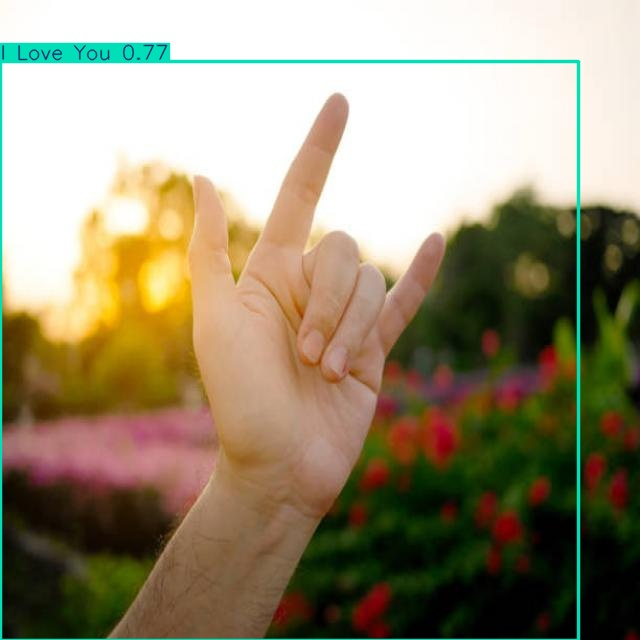

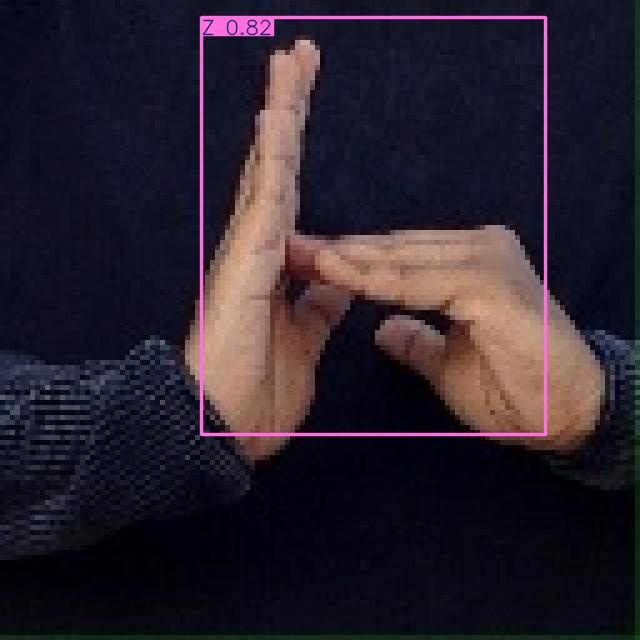

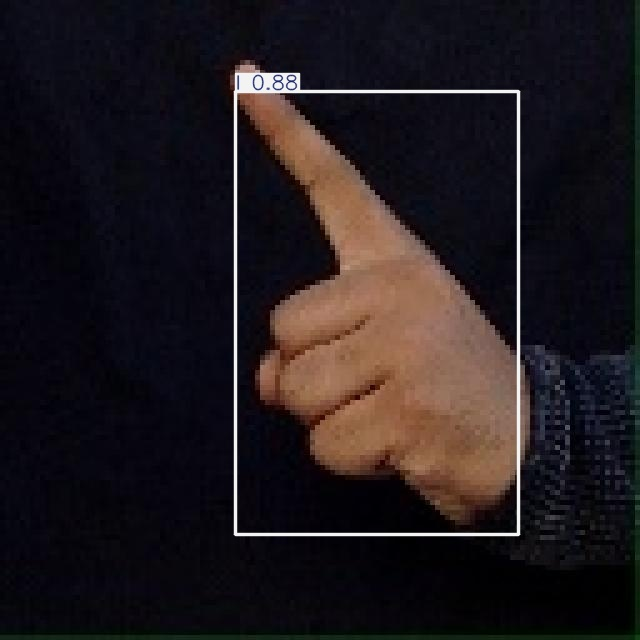

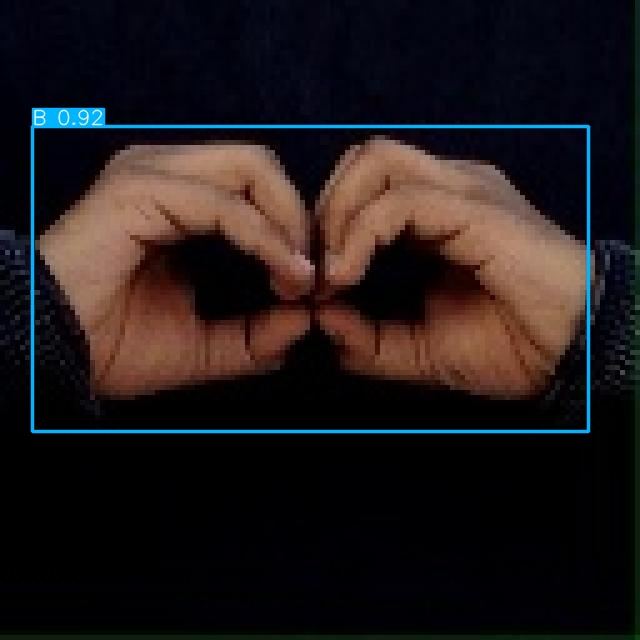

In [11]:
# Step 4: Predict with the trained model
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/test/images" save=True

# Step 5: Display predictions
latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)

for img in glob.glob(f'{latest_folder}/*.jpg')[:4]:
    display(Image(filename=img, width=1000))
    print("\n")

In [12]:
from google.colab import files

# Specify the path to the CSV file
train_results_file = "/content/runs/detect/train/results.csv"

# Download the file
files.download(train_results_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>